> <h1><b>TABLE OF CONTENTS</b></h1>
<ul>
    <a href='#1'><li>Content of the Dataset</li></a>
    <a href='#2'><li>Analyzing the Data</li></a>
    <a href='#3'><li>Visualization of Most Common 10 Crime Places</li></a>
    <a href='#4'><li>Visualization of Primary Types</li></a>
    <a href='#5'><li>Visualization of Comparing Arrested or Not</li></a>
    <a href='#6'><li>Visualization of Primary Types with Bar Plot</li></a>
    <a href='#7'><li>Plotting Primary Types Until 2012 to 2017</li></a>
    <a href='#8'><li>Number of Crimes by Location</li></a>
    <a href='#9'><li>Mapping Theft Crime Locations</li></a>
    <a href='#10'><li>Conclusion</li></a>
    <a href='#11'><li>References</li></a>
</ul>

<p id='1'><h2><b>Content of the Dataset</b></h2></p>
<b>ID</b> - Unique identifier for the record.

<b>Case Number</b> - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.

<b>Date</b> - Date when the incident occurred. this is sometimes a best estimate.

<b>Block</b> - The partially redacted address where the incident occurred, placing it on the same block as the actual address.

<b>IUCR</b> - The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description.

<b>Primary Type</b> - The primary description of the IUCR code.

<b>Description</b> - The secondary description of the IUCR code, a subcategory of the primary description.

<b>Location Description</b> - Description of the location where the incident occurred.

<b>Arrest</b> - Indicates whether an arrest was made.

<b>Domestic</b> - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.

<b>Beat</b> - Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts.

<b>District</b> - Indicates the police district where the incident occurred.

<b>Ward</b> - The ward (City Council district) where the incident occurred.

<b>Community Area</b> - Indicates the community area where the incident occurred. Chicago has 77 community areas.

<b>FBI Code</b> - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).

<b>X Coordinate</b> - The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

<b>Y Coordinate</b> - The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

<b>Year</b> - Year the incident occurred.

<b>Updated On</b> - Date and time the record was last updated.

<b>Latitude</b> - The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

<b>Longitude</b> - The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

<b>Location</b> - The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

<p id='2'><h2><b>Analyzing the Data</b></h2></p>

First as always we import libraries.  
Reading csv file.  
Information about data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("../input/Chicago_Crimes_2012_to_2017.csv",error_bad_lines=False,warn_bad_lines=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
Unnamed: 0              1456714 non-null int64
ID                      1456714 non-null int64
Case Number             1456713 non-null object
Date                    1456714 non-null object
Block                   1456714 non-null object
IUCR                    1456714 non-null object
Primary Type            1456714 non-null object
Description             1456714 non-null object
Location Description    1455056 non-null object
Arrest                  1456714 non-null bool
Domestic                1456714 non-null bool
Beat                    1456714 non-null int64
District                1456713 non-null float64
Ward                    1456700 non-null float64
Community Area          1456674 non-null float64
FBI Code                1456714 non-null object
X Coordinate            1419631 non-null float64
Y Coordinate            1419631 non-null float64
Year                    1

In this dataset we have 1.456.714 samples so it is hard for cpu to use all of the samples.  
Therefore, we will use random 200.000 samples

In [4]:
data_samples = data.sample(n=200000,random_state = 42)

* Sorting index with numpy.
* Looking for summation of NaN values.
* Cleaning the NaN values.

In [5]:
data_samples.index = np.arange(0,len(data_samples))

.isna() method is used to know how many NaN value we have and where the values are.

In [6]:
data_samples.isna().sum()

Unnamed: 0                 0
ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     210
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       0
Community Area             3
FBI Code                   0
X Coordinate            5145
Y Coordinate            5145
Year                       0
Updated On                 0
Latitude                5145
Longitude               5145
Location                5145
dtype: int64

Dropping NaN values.

In [7]:
data_samples.dropna(axis=0,inplace=True)

"Unnamed","Case Number","Block","IUCR","FBI Code","X Coordinate" and "Y Coordinate" columns are not necessary.  
So we will drop these columns.

In [8]:
data_samples.drop(["Unnamed: 0","Case Number","Block","IUCR","FBI Code","X Coordinate","Y Coordinate"],axis=1,inplace=True)

<p id='3'><h2><b>Visualization of Most Common 10 Crime Places</b></h2></p>

Looking for Location Descriptions to detect where the most event happened.  
Visualization of bar plot.  
Using of zip() method.

In [9]:
data_samples.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Updated On,Latitude,Longitude,Location
0,10593882,07/11/2016 10:06:00 PM,NARCOTICS,POSSESSION OF DRUG EQUIPMENT,STREET,True,False,1434,14.0,1.0,22.0,2016,07/18/2016 03:55:46 PM,41.915753,-87.688450,"(41.915752584, -87.688449763)"
1,10295228,10/30/2015 03:45:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,OTHER,False,False,1031,10.0,22.0,30.0,2015,11/06/2015 03:55:21 PM,41.837869,-87.724373,"(41.837869311, -87.724373124)"
2,8476417,02/03/2012 12:20:00 PM,DECEPTIVE PRACTICE,THEFT OF LABOR/SERVICES,CTA GARAGE / OTHER PROPERTY,False,False,222,2.0,3.0,38.0,2012,02/04/2016 06:33:39 AM,41.809347,-87.618919,"(41.809347098, -87.618919216)"
3,10309264,11/11/2015 08:00:00 PM,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,611,6.0,21.0,71.0,2015,11/18/2015 04:00:04 PM,41.747746,-87.664585,"(41.747746453, -87.664584768)"
4,9156961,06/03/2013 11:50:00 AM,INTERFERENCE WITH PUBLIC OFFICER,OBSTRUCTING IDENTIFICATION,ALLEY,True,False,1532,15.0,28.0,25.0,2013,02/04/2016 06:33:39 AM,41.886191,-87.750385,"(41.886190715, -87.750385437)"


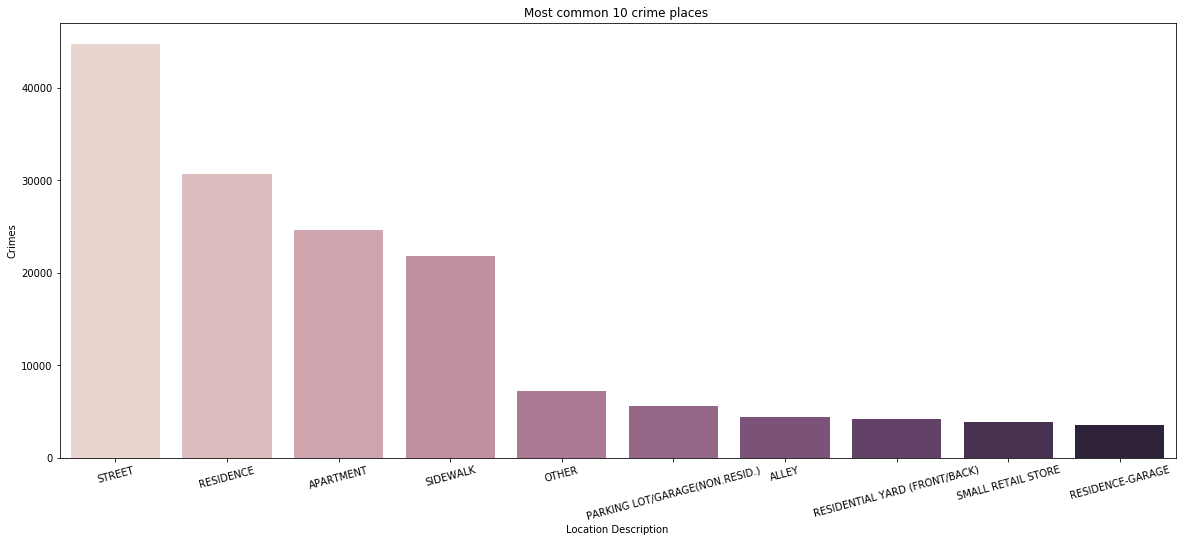

In [10]:
LocDescList = data_samples["Location Description"].unique()
LocDescList2 = data_samples["Location Description"]
LocDescRatio = []

counted = Counter(LocDescList2) 
mostcommon = counted.most_common(10)
x,y = zip(*mostcommon)
x,y = list(x),list(y)
# %% 
plt.figure(figsize = (20,8))
ax = sns.barplot(x = x , y = y, palette = sns.cubehelix_palette(len(x)))
plt.xticks(rotation= 15)
plt.xlabel("Location Description")
plt.ylabel("Crimes")
plt.title("Most common 10 crime places ")
plt.show()

<p id='4'><h2><b>Visualization of Primary Types</b></h2></p>

In this visualization we will see most common 10 primary types, associated with crimes.

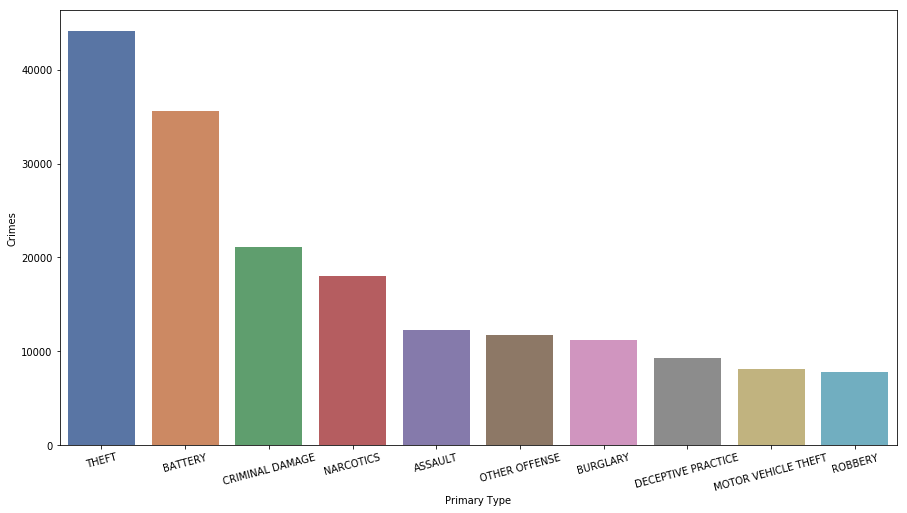

In [11]:
PrimaryType = data_samples["Primary Type"]
PrimaryTypeCounted = Counter(PrimaryType)
MostCommonPT = PrimaryTypeCounted.most_common(10)
x,y = zip(*MostCommonPT)
x,y  = list(x),list(y)

# %% 

plt.figure(figsize=(15,8))
ax = sns.barplot(x=x, y=y,palette = "deep")
plt.xticks(rotation= 15)
plt.xlabel("Primary Type")
plt.ylabel("Crimes")
plt.show()


<p id='5'><h2><b>Visualization of Comparing Arrested or Not</b></h2></p>

We look how many of them arrested and not arrested.

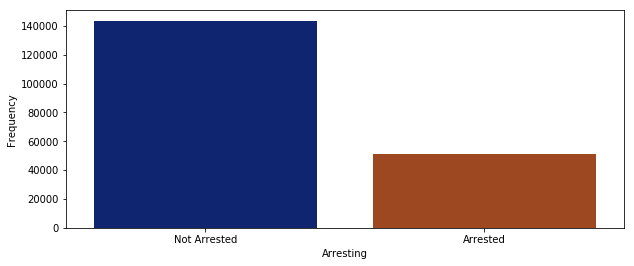

In [12]:
Arrest = data_samples["Arrest"]
CountedArrest = Counter(Arrest)
MostCommonCA = CountedArrest.most_common()
x,y = zip(*MostCommonCA)
x,y = list(x),list(y)
x[1] = "Arrested"
x[0] = "Not Arrested"
# %% 
plt.figure(figsize=(10,4))
sns.barplot(x = x , y = y , palette = "dark")
plt.xlabel("Arresting")
plt.ylabel("Frequency")
plt.show()

<p id='6'><h2><b>Visualization of Primary Types with Bar Plot</b></h2></p>

We will plot Crimes month by month from 2012 to 2017

In [13]:
Crimes = data.iloc[:, 3: ]
Crimes.head()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [ ]:
Crimes.index = Crimes.Date
Crimes.drop("Date",axis=1,inplace=True)

Crimes.index = pd.to_datetime(Crimes.index)

In [ ]:
CrimeCounts = pd.DataFrame(Crimes.groupby("Primary Type").size().sort_values(ascending=False).rename("counter").reset_index())

In [ ]:
CrimeCounts.head()

Plotting top 10 crimes

In [ ]:
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes("pastel")
sns.barplot(x="counter", y="Primary Type", data=CrimeCounts.iloc[:10, :],
            label="Total", palette="Blues_d")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",
       xlabel="Crimes")
sns.despine(left=True, bottom=True)

plt.show()

<p id='7'><h2><b>Plotting Primary Types Until 2012 to 2017</b></h2></p>

In [ ]:
crimes2012 = Crimes.loc["2012"]
crimes2013 = Crimes.loc["2013"]
crimes2014 = Crimes.loc["2014"]
crimes2015 = Crimes.loc["2015"]
crimes2016 = Crimes.loc["2016"]

Making DataFrame.

In [ ]:
crimes2012 = pd.DataFrame(crimes2012)
crimes2013 = pd.DataFrame(crimes2013)
crimes2014 = pd.DataFrame(crimes2014)
crimes2015 = pd.DataFrame(crimes2015)
crimes2016 = pd.DataFrame(crimes2016)

We select THEFT BATTERY ... in Primary Type, and we send those rows into theft_2012 ... 

In [ ]:
theft_2012 = pd.DataFrame(crimes2012[crimes2012['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
theft_2013 = pd.DataFrame(crimes2013[crimes2013['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
theft_2014 = pd.DataFrame(crimes2014[crimes2014['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
theft_2015 = pd.DataFrame(crimes2015[crimes2015['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
theft_2016 = pd.DataFrame(crimes2016[crimes2016['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])

In [ ]:
grouper2012 = theft_2012.groupby([pd.TimeGrouper('M'), 'Primary Type'])
grouper2013 = theft_2013.groupby([pd.TimeGrouper('M'), 'Primary Type'])
grouper2014 = theft_2014.groupby([pd.TimeGrouper('M'), 'Primary Type'])
grouper2015 = theft_2015.groupby([pd.TimeGrouper('M'), 'Primary Type'])
grouper2016 = theft_2016.groupby([pd.TimeGrouper('M'), 'Primary Type'])

In [ ]:
data_2012 = grouper2012['Primary Type'].count().unstack()
data_2013 = grouper2013['Primary Type'].count().unstack()
data_2014 = grouper2014['Primary Type'].count().unstack()
data_2015 = grouper2015['Primary Type'].count().unstack()
data_2016 = grouper2016['Primary Type'].count().unstack()

In [ ]:
DataAll = pd.DataFrame()
DataAll=DataAll.append([data_2012,data_2013,data_2014,data_2015,data_2016])

In [ ]:
DataAll.plot()
plt.show()

<p id='8'><h2><b>Number of Crimes by Location</b></h2></p>

In [ ]:
Crimes2 = pd.DataFrame(Crimes[Crimes['Location Description'].isin(['APARTMENT','RESIDENCE', 'STREET', 'SIDEWALK','OTHER','ALLEY','RESTAURANT','GAS STATION'])])
Crimes2.head()

In [ ]:
plt.figure(figsize=(8,10))
Crimes2.groupby([Crimes2['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

<p id='9'><h2><b>Mapping Theft Crime Locations</b></h2></p>

I have got help from another kernel to plotting this map.  
First we import folium library to create map.  
Using of as below (if you want to create a map you want to create you can write google for ex. Location of Miami).

In [ ]:
import folium

MapOfChicago = folium.Map(location=[41.881832, -87.623177],
                         zoom_start=11)

In [ ]:
Crimes = Crimes.dropna()
Crimes = Crimes.drop(columns=['Block', 'IUCR','Domestic', 'Beat', 'District', 'Ward','X Coordinate', 'Y Coordinate','Updated On', 'FBI Code'], axis = 1)

First row we select only THEFT Primary Type.  
With groupby we sort unique values of the selected column.

In [ ]:
Crimes = Crimes[Crimes["Primary Type"] == "THEFT"]
locations = Crimes.groupby('Community Area').first()
new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]

In [ ]:
for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(MapOfChicago)
MapOfChicago

<p id='10'><h2><b>Conclusion</b></h2></p>
In this dataset we looked at Crimes in Chicago.

We have learned : 
* How we can plot a map with folium,
* How to use groupby method and some plotting tools. 

If you like, please upvote! 

<p id='11'><h2><b>References</b></h2></p>

https://www.kaggle.com/djonafegnem/chicago-crime-data-analysis

https://www.kaggle.com/fahd09/eda-of-crime-in-chicago-2005-2016

https://www.kaggle.com/uds5501/chicago-crime-mapping